In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Important Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from scipy import stats
# view accuracy
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#### Import Dataset

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

## Data Exploration

In [ ]:
#first 5 rows of the dataset.
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#shape of data
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 10000
Number of Columns 14


In [ ]:
#get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#get unique values
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#check missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We don't have any missing value in the dataset 

In [ ]:
#check duplicate values 
data.duplicated().sum()

0

We don't have duplicate value in the dataset 

In [ ]:
#all columns name
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#descriptive statistics summary
data.describe(include ='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
#drop unimportant columns
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

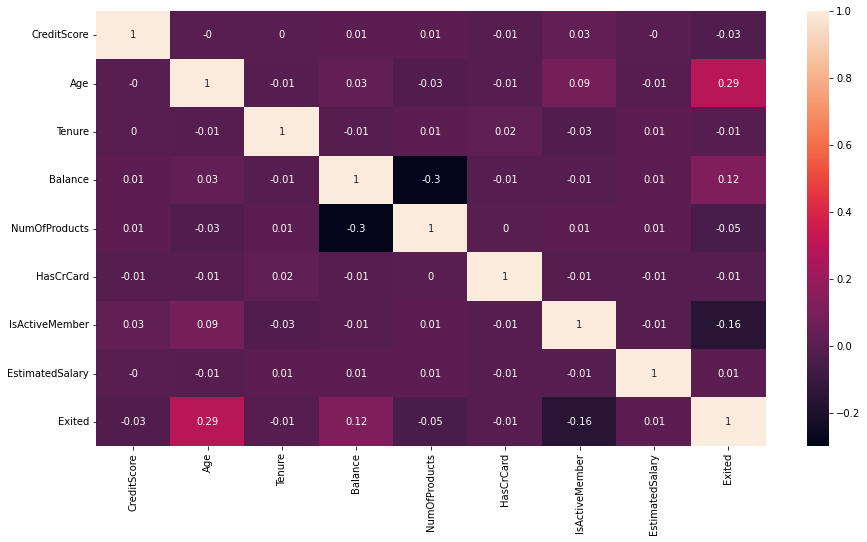

In [ ]:
#the correlation between variables
sns.heatmap(data.corr(method='pearson').round(2),annot=True)
plt.gcf().set_size_inches(15, 8)

Heatmap confirms that there is no strong correlation between the features.

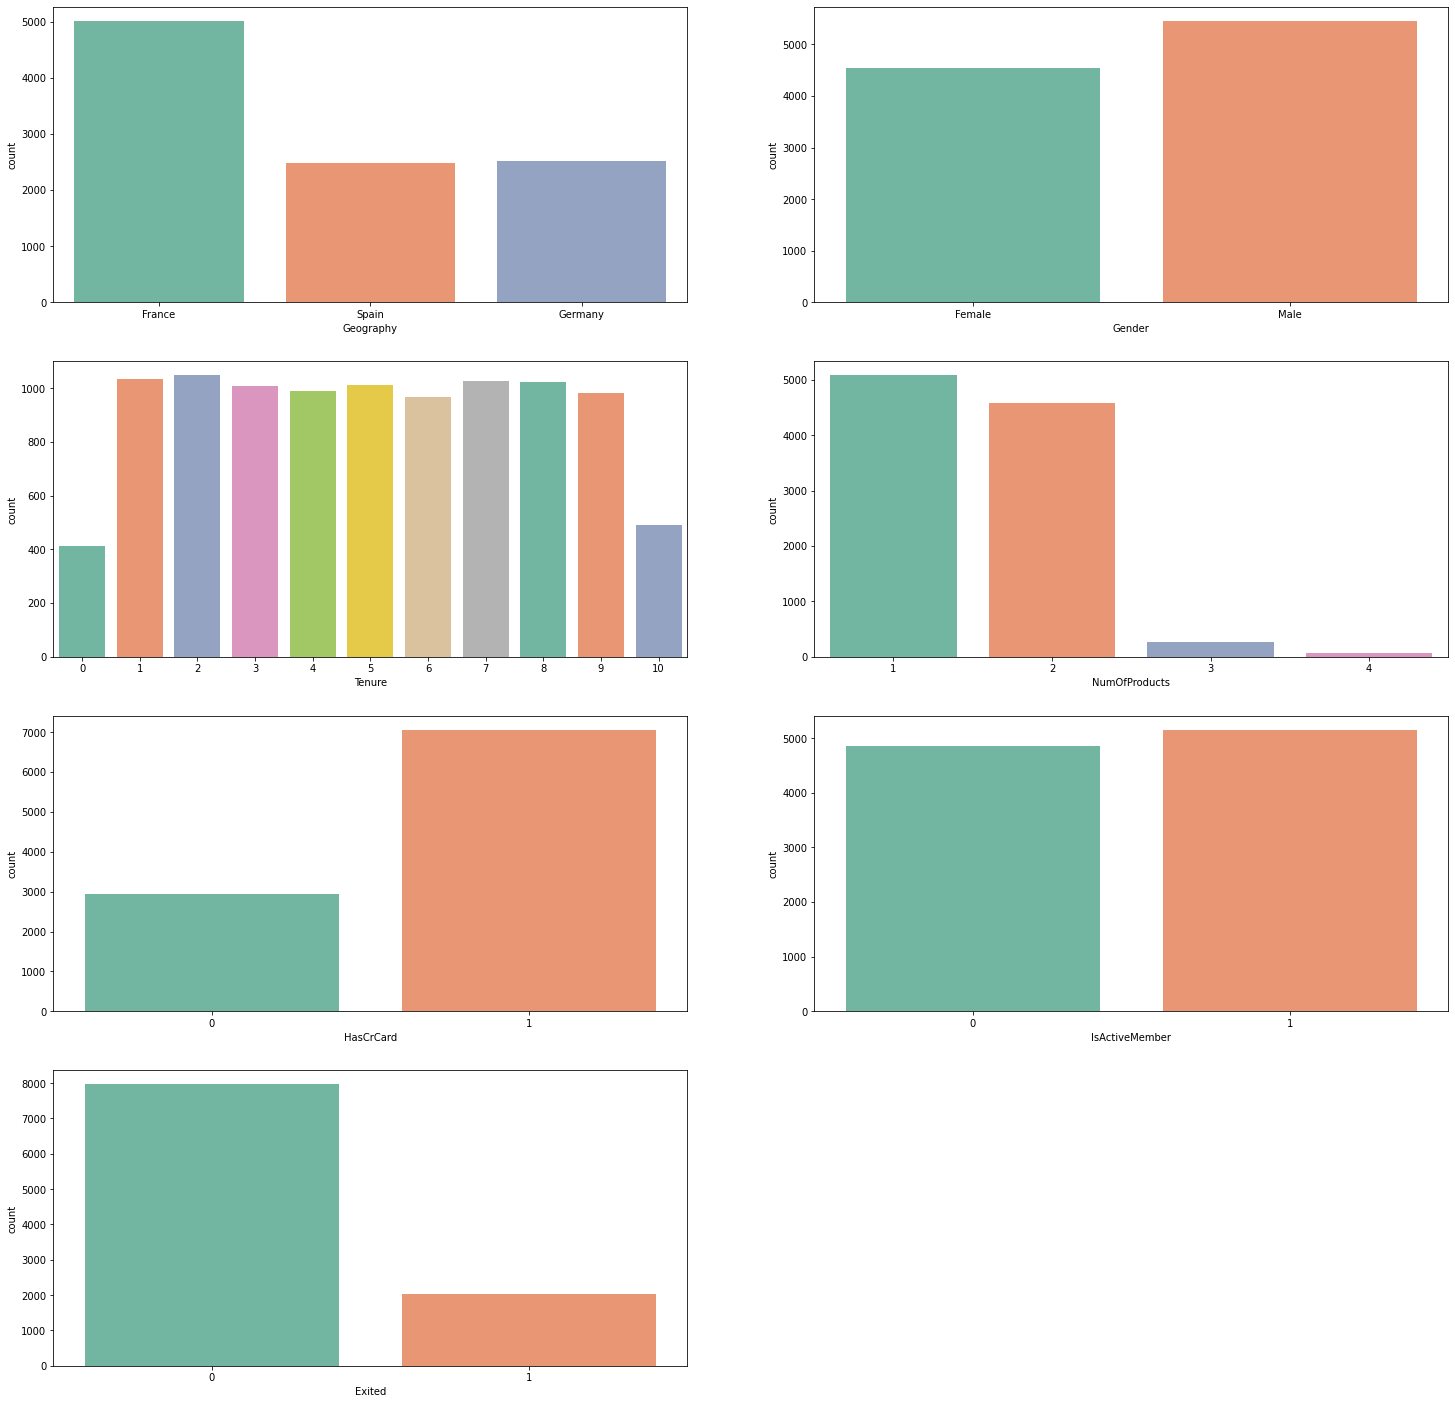

In [ ]:
#univariate analysis 
#Categorical Variables
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'Geography', palette='Set2', data = data)

plt.subplot(4,2,2)
sns.countplot(x = 'Gender', palette='Set2', data = data)

plt.subplot(4,2,3)
sns.countplot(x = 'Tenure', palette='Set2', data = data)

plt.subplot(4,2,4)
sns.countplot(x = 'NumOfProducts', palette='Set2', data = data)

plt.subplot(4,2,5)
sns.countplot(x = 'HasCrCard', palette='Set2', data = data)

plt.subplot(4,2,6)
sns.countplot(x = 'IsActiveMember', palette='Set2', data = data)

plt.subplot(4,2,7)
sns.countplot(x = 'Exited', palette='Set2', data = data);

### univariate
- Geography -> ~50% most of observations are from France, ~25% from Spain, ~25% from Germany
- Gender -> ~55% Male, and ~45% Femal
- NumOfProducts -> ~50% of cutomers got just 1 product, ~46% got 2, ~3% got 3, and ~1% got 4 products
- HasCrCard -> ~30% paid Cash, and ~70% by credit card

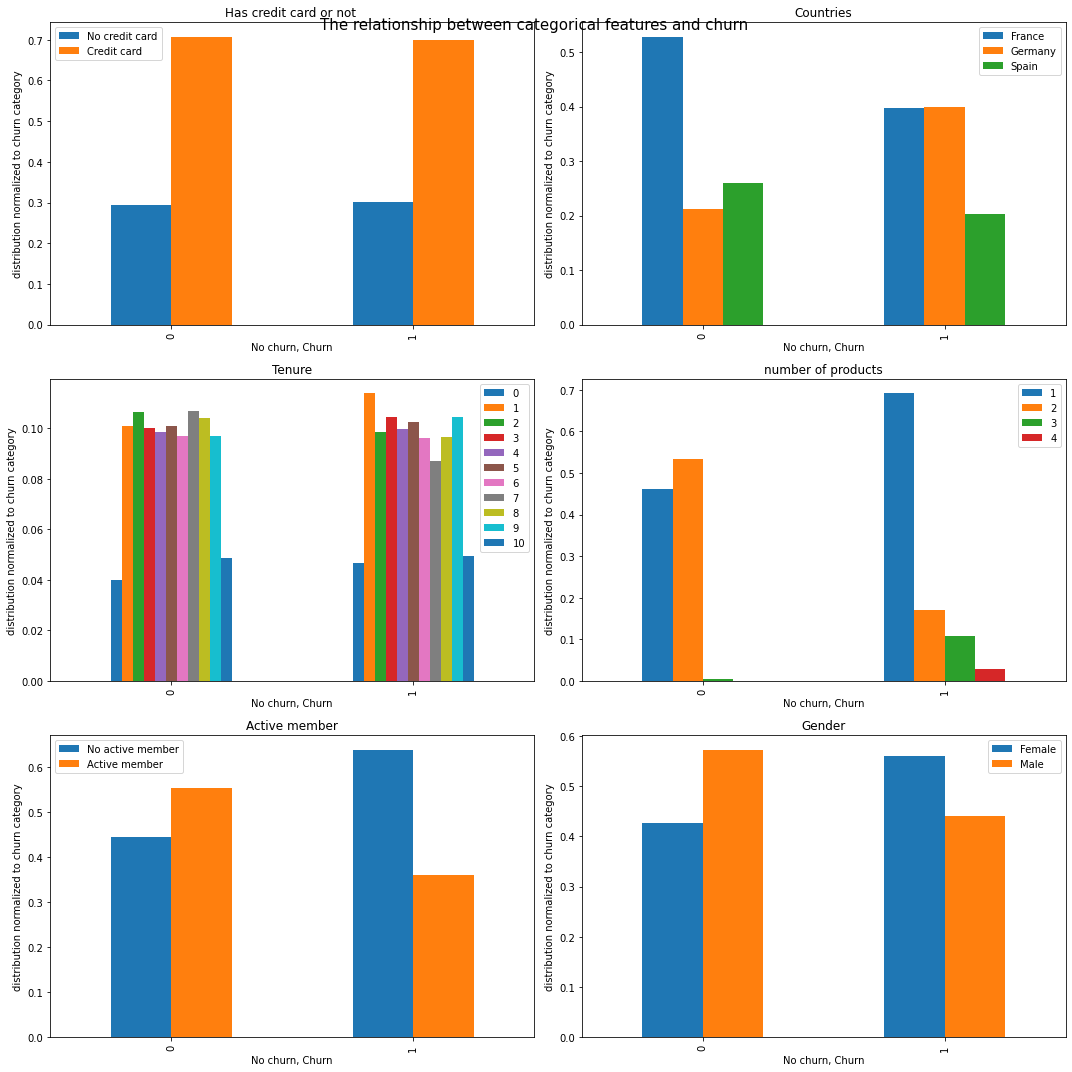

In [ ]:
#Bivariate Analysis
#the relation with categorical variables and target variable
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[15,15])

pd.crosstab(index=data.Exited, columns=data.HasCrCard, normalize='index').plot(kind='bar', legend=True, ax=ax[0,0], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Has credit card or not ');
ax[0,0].legend(labels=['No credit card','Credit card'], loc='best')
pd.crosstab(index=data.Exited, columns=data.Geography, normalize='index').plot(kind='bar', legend=True, ax=ax[0,1], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Countries');
ax[0,1].legend(loc='best')
pd.crosstab(index=data.Exited, columns=data.Tenure, normalize='index').plot(kind='bar', legend=True, ax=ax[1,0], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Tenure');
ax[1,0].legend(loc='best')
pd.crosstab(index=data.Exited, columns=data.NumOfProducts, normalize='index').plot(kind='bar', legend=True, ax=ax[1,1], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='number of products');
ax[1,1].legend(loc='best')
pd.crosstab(index=data.Exited, columns=data.IsActiveMember, normalize='index').plot(kind='bar', legend=True, ax=ax[2,0], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Active member');
ax[2,0].legend(labels=['No active member','Active member'],loc='best')
pd.crosstab(index=data.Exited, columns=data.Gender, normalize='index').plot(kind='bar', legend=True, ax=ax[2,1], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Gender');
ax[2,1].legend(loc='best')

fig.suptitle('The relationship between categorical features and churn ', size = 15)
plt.tight_layout()

* The number of french customers is double  the number of german and spanish customers, it is noticeable that the number of french and german customers which churn  is roughly equally hi we can see that more female customers churn.
* customers that have one product is significantly more churn.
* None active customers are churn more than active customers.
* the tenure seems to have no affect on churn.
* one thing is interesting most of churn customers have credit card.
* female customers are more chrun than male customers.

### Bivariate

* for who that didn't have a hasCrCard (~79% don't churn, and ~21% churn)
* for who that have a hasCrCard (~80% don't churn, and ~20% churn)
* it seems that CrCard does not statistically significant and doesn't affect the customer churn. (need statistical Test)

* form the whole churn observations (~40% from France, ~20% Spain, and 40% Germany),
* we can't say here that France and Germany are equaly important, becaues the France has 50% of total number of observations, and Germany only 25%,
* so we need to focuse on Germany more than France, because 16% of French people churned, but 32% of German people churned.


* 27 from each 100 people who bought 1 product were churned (1409/5084)
* 7 from each 100 people who bought 2 products were churned (348/4590)
* in case of bought 3 product, the probability of churn is 80% (220/266). # the data is very small, so we can't relay on those results
* in case of bought 4 // ,     the probability of churn is 100% (60/60). # the data is very small, so we can't relay on those results

* from the whole churn (~44% Male and ~56% ), and from all observation, the churn probability of Femal is 25% and 16% for Male

<Figure size 1080x1080 with 0 Axes>

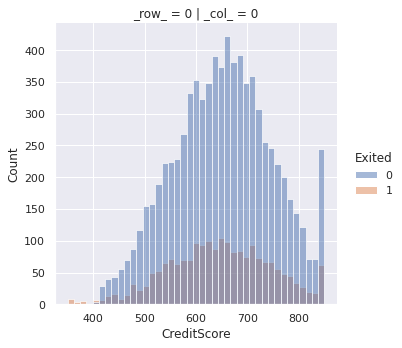

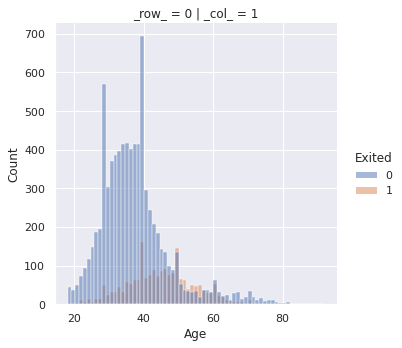

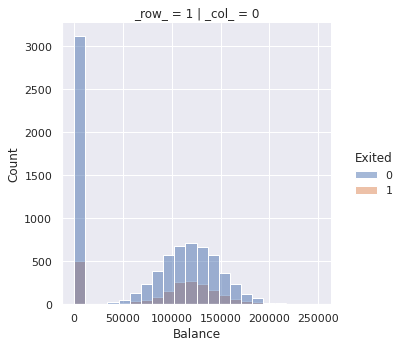

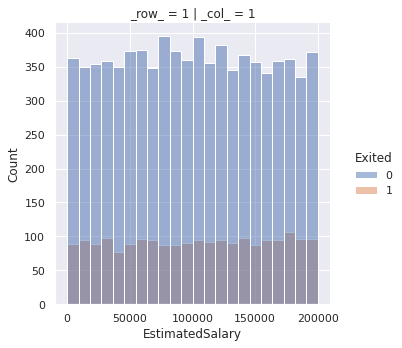

In [ ]:
#univariate analysis 
#continous variables
plt.figure(figsize = (15,15))
# fig, axes = plt.subplots(2, 2)
sns.set(color_codes = True)

# plt.subplot(3,2,1)
sns.displot(data, x='CreditScore', hue='Exited', row=0, col=0)

# plt.subplot(3,2,2)
sns.displot(data, x='Age', hue='Exited', row=0, col=1)

# plt.subplot(3,2,3)
# sns.displot(data[''], kde = False)
sns.displot(data, x='Balance', hue='Exited', row=1, col=0)

# plt.subplot(3,2,4)
# sns.distplot(data['EstimatedSalary'], kde = False)
sns.displot(data, x='EstimatedSalary', hue='Exited', row=1, col=1)

* credit score  is practically a normal distribution.
* most age of customers are between 20 and 40 years old.
* large number of customers that have no value on the balance sheet.
* salary we have well distributed values.

### 
* From the Age distribution, it seems that churn increases when the age increases.

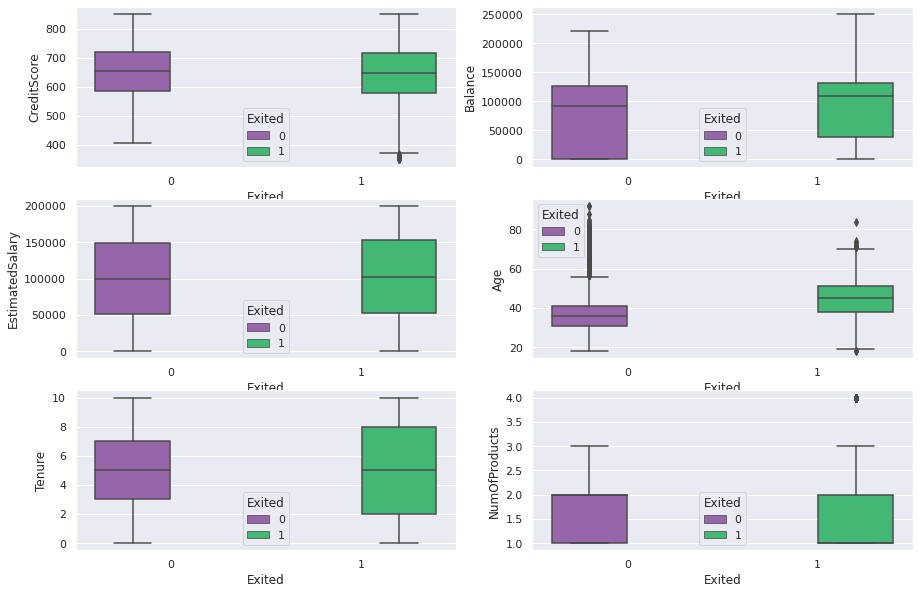

In [ ]:
# Relations based on the continuous data features
fig, axarr = plt.subplots(3, 2, figsize=(15, 10))
colors = ["#9b59b6", "#2ecc71"]
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, palette= colors,  ax=axarr[0][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, palette= colors, ax=axarr[0][1])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, palette= colors, ax=axarr[1][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , palette= colors, ax=axarr[1][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, palette= colors, ax=axarr[2][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, palette= colors, ax=axarr[2][1]);

* There is no significant difference in balance,estimated salary and number of products, they are between customers who churned and not.
* The older customers churned more than the young ones which means the bank needs to focus on older customers more.
* Customers with tenure either too less or too more churned more.
* Customers who churned  have the highest balance which is a bad indicator.
* there are outliers in number of product ,credit score and age, we need to normalize them.

Text(0.5, 0.98, 'Proportion of customer churn and retained')

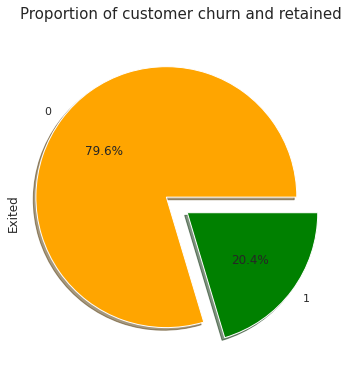

In [ ]:
myexplode = [0.2, 0]
mycolors = ["orange", "green"]
data["Exited"].value_counts().plot(kind='pie', figsize= (7,6) ,explode = myexplode, shadow = True , colors = mycolors , autopct = '%1.1f%%')
plt.suptitle("Proportion of customer churn and retained",  size = 15)

* the data imbalance.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [ ]:
def find_best_num(model, X_train, Y_train, X_test ):
    fs = SelectKBest(score_func=model, k='all')
    fs.fit(X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

In [ ]:
# feature selection
def select_features(model,X_train,y_train,X_test,K):
    fs = SelectKBest(score_func=model, k=K)
    fs.fit(X_train, y_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)
    return X_train, X_test

In [ ]:
def evaluation (stack_model,X_train, X_test, y_train, y_test ):
    print("Training Accuracy :\t ", stack_model.score(X_train, y_train))

    #Scoring the model on test_data
    print("Testing Accuracy :\t ",  stack_model.score(X_test, y_test))

    y_predx = stack_model.predict(X_test)
    
    print('Confusion matrix:\n ', confusion_matrix(y_test, y_predx))
    print(classification_report(y_test, y_predx))
    plot_confusion_matrix(stack_model, X_test, y_test)
    plt.title("confusion matrix") 
    plt.grid('off') 
    plt.show()

#### Encoding Categorical Data

In [ ]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data = pd.get_dummies(data=data, columns=['Gender','Geography'])
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [82]:
X = data.drop('Exited', axis=1)
y = data['Exited']

#### Split the dataset into train and test

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 30, stratify =y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [84]:
from collections import Counter
Counter(y_train)

Counter({0: 6370, 1: 1630})

#### Outlier Detection

In [85]:
fig = make_subplots(rows=3, cols=1)
age=go.Box(x=X_train['Age'],name='Age Box Plot',boxmean=True)
cs=go.Box(x=X_train['CreditScore'],name='CreditScore Box Plot',boxmean=True)
no_prod=go.Box(x=X_train['NumOfProducts'],name='Num of Product Box Plot',boxmean=True)

fig.add_trace(age,row=1,col=1)
fig.add_trace(cs,row=2,col=1)
fig.add_trace(no_prod,row=3,col=1)
fig.update_layout(height=700, width=700)
fig.show()

In [86]:
lower_limit_age =  X_train["Age"].quantile(0.03)  
upper_limit_age =  X_train["Age"].quantile(0.97)
print(lower_limit_age), print(upper_limit_age)

23.0
64.0


(None, None)

In [87]:
X_train["Age"] = np.where(X_train["Age"]> upper_limit_age, upper_limit_age,
                          np.where(X_train["Age"]< lower_limit_age, lower_limit_age,
                          X_train["Age"]))

In [88]:
lower_limit_Crd = X_train["CreditScore"].quantile(0.03)  
upper_limit_Crd = X_train["CreditScore"].quantile(0.97)
print(lower_limit_Crd), print(upper_limit_Crd)

467.97
837.0299999999997


(None, None)

In [89]:
X_train["CreditScore"] = np.where(X_train["CreditScore"]> upper_limit_Crd, upper_limit_Crd,
                         np.where(X_train["CreditScore"]< lower_limit_Crd, lower_limit_Crd,
                         X_train["CreditScore"]))

In [90]:
lower_limit_pro = X_train["NumOfProducts"].quantile(0.03)  
upper_limit_pro = X_train["NumOfProducts"].quantile(0.97)
print(lower_limit_pro), print(upper_limit_pro)

1.0
3.0


(None, None)

In [91]:
fig = make_subplots(rows=3, cols=1)
age=go.Box(x=X_train['Age'],name='Age Box Plot',boxmean=True)
cs=go.Box(x=X_train['CreditScore'],name='CreditScore Box Plot',boxmean=True)
no_prod=go.Box(x=X_train['NumOfProducts'],name='Num of Product Box Plot',boxmean=True)

fig.add_trace(age,row=1,col=1)
fig.add_trace(cs,row=2,col=1)
fig.add_trace(no_prod,row=3,col=1)

fig.update_layout(height=700, width=700)
fig.show()

#### Handling imbalanced data using SMOTE

In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 30)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
Counter(y_train_smote)

Counter({0: 6370, 1: 6370})

#### Feature Scalling

In [93]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

sc = StandardScaler()
X_train_smote = sc.fit_transform(X_train_smote)
X_test_smote = sc.transform(X_test)

In [94]:
# take sample from data to test the best Model and best paramter
x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(X_train_smote, y_train_smote, test_size=0.90, random_state= 30, stratify=y_train_smote)
x_train_sample.shape, x_test_sample.shape

((1274, 13), (11466, 13))

In [95]:
# featuer selection using anova
from xgboost.sklearn import XGBClassifier

features_score = []
for i in range(1, x_train_sample.shape[1]+1):
    fs = SelectKBest(score_func=f_classif, k=i)
    fs.fit(x_train_sample, y_train_sample)

    new_features_train = fs.transform(x_train_sample)
    new_features_test = fs.transform(x_test_sample)

    xgbc = XGBClassifier(random_state = 30)
    xgbc.fit(new_features_train, y_train_sample)
    features_score.append(f1_score(y_test_sample, xgbc.predict(new_features_test), average='macro'))

Text(0, 0.5, 'f1-macro score on testset')

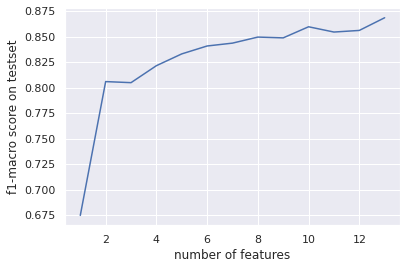

In [96]:
plt.plot(range(1, x_train_sample.shape[1]+1), features_score)
plt.xlabel('number of features')
plt.ylabel('f1-macro score on testset')

In [97]:
# it seems that all features is important and model got high accuracy when preserve the features

# check the best model

In [98]:
from lazypredict.Supervised import LazyClassifier
mod = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = mod.fit(x_train_sample, x_test_sample, y_train_sample, y_test_sample)

100%|██████████| 29/29 [00:06<00:00,  4.72it/s]


In [99]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.87               0.87     0.87      0.87   
LGBMClassifier                     0.86               0.86     0.86      0.86   
AdaBoostClassifier                 0.86               0.86     0.86      0.86   
SVC                                0.86               0.86     0.86      0.86   
RandomForestClassifier             0.86               0.86     0.86      0.86   
ExtraTreesClassifier               0.86               0.86     0.86      0.86   
NuSVC                              0.85               0.85     0.85      0.85   
LinearSVC                          0.83               0.83     0.83      0.83   
LogisticRegression                 0.83               0.83     0.83      0.83   
CalibratedClassifierCV             0.83               0.83     0.83      0.83   
RidgeClassifierCV           

In [ ]:
# XGBoost got the highest F1-Score, then LGBMClassifier
from sklearn.model_selection import GridSearchCV

best_models = {}

def grid_search_and_get_the_best_paramaters(model, search_space, x, y):

    GS = GridSearchCV(estimator = model, 
                      param_grid = search_space, 
                      scoring = 'f1_macro',
                      cv = 5, 
                      verbose = 0)

    GS.fit(x, y)

    return {"best_baramters": GS.best_params_, "model": model}

In [ ]:
# get the best paramters of XGBoost on sample data
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier(random_state = 30)
search_space = {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [3, 6, 9],
    'gamma' : [0.01, 0.1,0.1],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}  

best_models["xgboost"] = grid_search_and_get_the_best_paramaters(xgbc, search_space, x_train_sample, y_train_sample)

In [ ]:
# test LGBMClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=30)

search_space = {
    'n_estimators' : [20, 50, 100,500],
    'learning_rate' : [0.01, 0.1, 0.5, 1],
    'max_depth' : [-2, -1, 0, 1,2 ]
}  

best_models["lgbm"] = grid_search_and_get_the_best_paramaters(lgbm, search_space, x_train_sample, y_train_sample)

In [ ]:
# test AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adbost = AdaBoostClassifier( random_state=30)

search_space = {
    'n_estimators' : [20, 50, 100,500],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.01, 0.1, 0.3, 1]
}  

best_models["adaboost"] = grid_search_and_get_the_best_paramaters(adbost, search_space, x_train_sample, y_train_sample)

In [ ]:
#importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=30)

search_space = {
    'n_estimators' : [20, 50, 100, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [-2, -1, 0, 1,2 ]
} 

best_models["random_forest"] = grid_search_and_get_the_best_paramaters(RF, search_space, x_train_sample, y_train_sample)

In [ ]:
# test SVM
from sklearn.svm import SVC
scv=SVC()

search_space = {
    'C' : [0.01, 0.001, 1,0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3,4]
} 

best_models["svm"] = grid_search_and_get_the_best_paramaters(scv, search_space, x_train_sample, y_train_sample)

In [ ]:
# here we will test the models on all data we have without smote
models_scores = []
models_names = []
models_itself = []
for model_name, model in best_models.items():
  models_names.append(model_name)
  m = model['model'].__class__(random_state=30, **model['best_baramters']).fit(X_train_normalized, y_train)
  models_itself.append(m)
  models_scores.append(f1_score(y_test, m.predict(X_test_normalized), average='macro'))

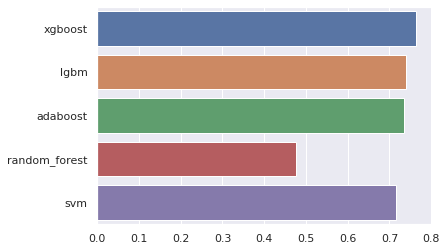

In [ ]:
sns.barplot(y=models_names, x=models_scores)

In [ ]:
# try Ensample learning
from sklearn.ensemble import StackingClassifier
estimator_list = list(zip(models_names, models_itself))

stack_model = StackingClassifier(estimators=estimator_list).fit(X_train_normalized, y_train)

In [ ]:
models_names.append('ensample_stacking')
models_itself.append(stack_model)
models_scores.append(f1_score(y_test, stack_model.predict(X_test_normalized), average='macro'))

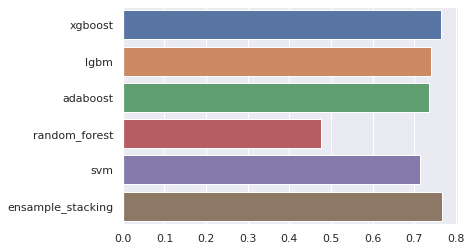

In [ ]:
sns.barplot(y=models_names, x=models_scores)

In [ ]:
sorted(zip(models_names, models_scores), key=lambda x: x[1])

[('random_forest', 0.4759244479914871),
 ('svm', 0.7146825843751174),
 ('adaboost', 0.7356610902662875),
 ('lgbm', 0.7392490372272145),
 ('xgboost', 0.7637303913597594),
 ('ensample_stacking', 0.7659227000544366)]

Training Accuracy :	  0.869
Testing Accuracy :	  0.871
Confusion matrix:
  [[1541   52]
 [ 206  201]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



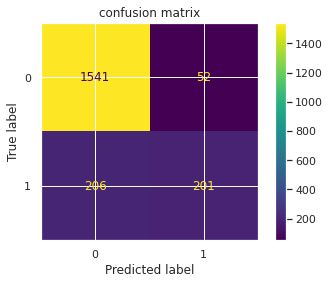

In [ ]:
evaluation(stack_model,  X_train_normalized, X_test_normalized, y_train, y_test)

In [ ]:
# here we will test the models on all data we have with smote
models_scores = []
models_names = []
models_itself = []
for model_name, model in best_models.items():
  models_names.append(model_name)
  m = model['model'].__class__(random_state=30, **model['best_baramters']).fit(X_train_smote, y_train_smote)
  models_itself.append(m)
  models_scores.append(f1_score(y_test, m.predict(X_test_smote), average='macro'))

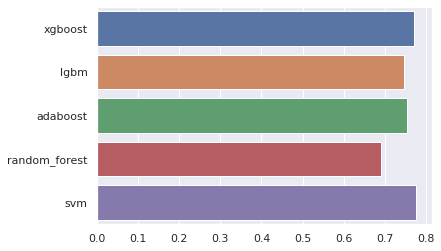

In [ ]:
sns.barplot(y=models_names, x=models_scores)

In [74]:
# try Ensample learning
from sklearn.ensemble import StackingClassifier
estimator_list = list(zip(models_names, models_itself))

stack_model = StackingClassifier(estimators=estimator_list).fit(X_train_smote, y_train_smote)

In [76]:
models_names.append('ensample_stacking')
models_itself.append(stack_model)
models_scores.append(f1_score(y_test, stack_model.predict(X_test_smote), average='macro'))

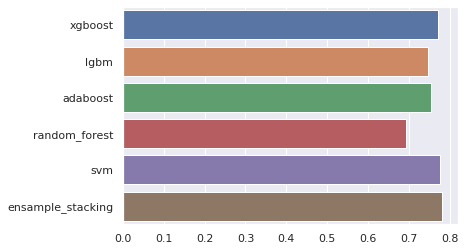

In [78]:
sns.barplot(y=models_names, x=models_scores)

In [79]:
sorted(zip(models_names, models_scores), key=lambda x: x[1])

[('random_forest', 0.6922298505639836),
 ('lgbm', 0.7467315400095511),
 ('adaboost', 0.7543601080815525),
 ('xgboost', 0.7720142385334327),
 ('svm', 0.7764464637529653),
 ('ensample_stacking', 0.7798428416592768)]

Training Accuracy :	  0.8865777080062794
Testing Accuracy :	  0.857
Confusion matrix:
  [[1449  144]
 [ 142  265]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1593
           1       0.65      0.65      0.65       407

    accuracy                           0.86      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.86      0.86      0.86      2000



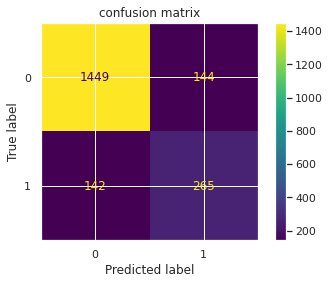

In [80]:
evaluation(stack_model,  X_train_smote, X_test_smote, y_train_smote, y_test)